# Tutorial 3_Extension

I want to 

# Libraries


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Standard Linear Regression

In [7]:
# online copy
df = pd.read_csv('http://pogo.software/me4ml/xray.csv')
df.head()

,Distance (mm),Total absorption
0,3.342876,175.719675
1,1.203074,57.261716
2,3.976552,179.448952
3,3.335264,176.218606
4,3.400901,167.033748


In [163]:
x = df['Distance (mm)']
y = df['Total absorption']
len(X.shape)

2

Background material:

X-ray power decreases linearly as a function of distance, so:
$$P \propto -\lambda d$$

Where $\lambda>0$

This results in an exponential decay as the X-ray propagates through space.
In practice, when an X-ray passes through objects, there is a phenomenon called 'beam hardening', which reduces the attenuation value, so the relationship is no longer linear.

In this tutorial, we are interested in finding a simple polynomial relationship [1]

In [164]:
""" THIS IS FOR LATER"""

def LinearRegression(X, y):
    """
    A function that performs a multivariate linear regression with predictors X and
    target y
    
    NOTE: X must be a dataframe as input, NOT series
    """
    
    n_attr = X.shape[1] if len(X.shape) > 1 else 1
    n_points = X.shape[0]
    X = np.append(np.ones([n_points,1]), X, axis=1)
    print(X)

LinearRegression(X,y)

[[1.         3.34287623]
 [1.         1.20307351]
 [1.         3.97655155]
 ...
 [1.         3.39895966]
 [1.         3.86754899]
 [1.         3.42430557]]


In [193]:
class Regression():
    """ Class for regression """
    def __init__(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        beta = None
    

    def LinReg2D(self):
        n_points = self.X.shape[0]
        A = np.array([
            [self.X.sum(), (self.X**2).sum()],
            [n_points, self.X.sum()],
        ])
        b = np.array([
            [np.dot(self.X,self.y)],
            [self.y.sum()]
        ])
        print(A,b)
        self.beta = np.linalg.solve(A,b)
        return self.beta
    
    def LinearRegression(self):
        n_points = self.X.shape[0]
        
        n_attr = self.X.shape[1]
        A = np.zeros([n_attr + 1, n_attr +1])
        b = np.zeros([n_attr+1,1])
        for i in range(n_attr+1):
            b[i] = np.dot(self.y, (self.X[:,0])**(n_attr-i))
            for j in range(n_attr+1):
                A[i,j] = np.sum((self.X[:,0])**(n_attr - i + j))
        print(A,b)
        self.beta = np.linalg.solve(A,b)
        print(self.beta)
        return self.beta
        
    def plot(self,**kwargs):
        plt.plot(self.X[:,0], self.y,'.')
        x = np.linspace(0,6,200)
        y = np.zeros(200)
        for i, coeff in enumerate(self.beta):
            print(i, coeff)
            y = np.add(y, coeff*x**i)
            
        plt.plot(x,y,**kwargs)
    

model = Regression(x,y)
model.LinReg2D()
model.plot(color='black')
model.beta

[[3000.8863473  9979.55332572]
 [1000.         3000.8863473 ]] [[482776.42824979]
 [149967.06847032]]


IndexError: too many indices for array

In [194]:
# this is only for the sake of testing
b = np.zeros([3,1])
model = Regression(x,y)
model.LinearRegression()
model.plot(color = 'black')
model.beta


IndexError: tuple index out of range

In [195]:
# define new "polynomial dataframe"
df['Dist_squared'] = x**2
df.head()

,Distance (mm),Total absorption,Dist_squared
0,3.342876,175.719675,11.174821
1,1.203074,57.261716,1.447386
2,3.976552,179.448952,15.812962
3,3.335264,176.218606,11.123983
4,3.400901,167.033748,11.566126


[[  9979.55332572  35827.1979127  136929.351774  ]
 [  3000.8863473    9979.55332572  35827.1979127 ]
 [  1000.           3000.8863473    9979.55332572]] [[1683776.78670197]
 [ 482776.42824979]
 [ 149967.06847032]]
[[ 3.32219469]
 [67.59434588]
 [-5.63132177]]
0 [3.32219469]
1 [67.59434588]
2 [-5.63132177]


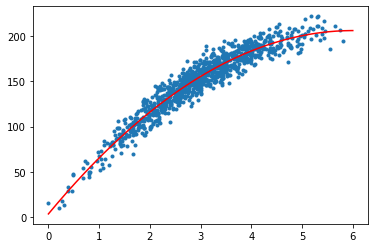

In [196]:
X = df[['Distance (mm)','Dist_squared']]

model = Regression(X, y)
model.LinearRegression()
model.plot(color = 'red')

# References

Note: citations do not follow any well-established format.

[1] ME4 Machine Learning, Peter Huthwaite, Imperial College London